In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

In [2]:
df_1 = pd.read_csv('train.csv')

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df_2 = df_1.groupby('Survived').size()

In [6]:
print(df_2)

Survived
0    549
1    342
dtype: int64


In [7]:
table_1 = pd.crosstab(df_1['Survived'],df_1['Sex'])
print(table_1)

Sex       female  male
Survived              
0             81   468
1            233   109


In [8]:
## Step 8 Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
table_2 = pd.crosstab(df_1['Survived'],df_1['Pclass'])
print(table_2)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


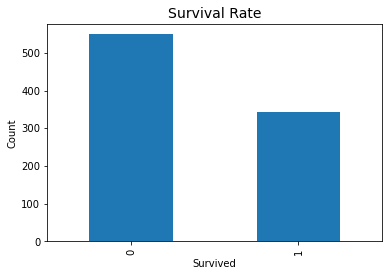

In [9]:
#Step 2 Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

df_1.groupby(['Survived']).size().plot(kind='bar',stacked=True)
plt.title("Survival Rate",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Survived');

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


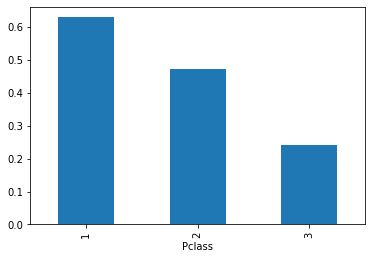

In [10]:

#Step 3 Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

df_1.groupby('Pclass').Survived.mean().plot(kind='bar')
print (df_1.groupby('Pclass').Survived.value_counts())


C:\Users\vuger\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vuger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


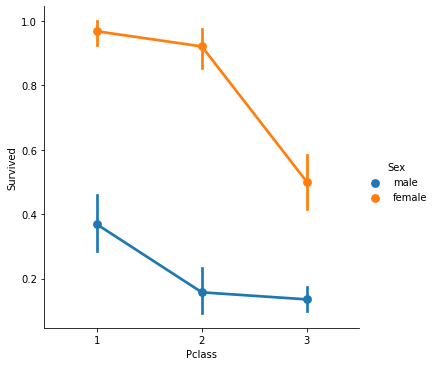

In [11]:
# Step 4 Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

sns.factorplot('Pclass','Survived',hue='Sex',data=df_1)

In [12]:
## Step 6, Step 8 Calculate the average age for survived and drowned passengers separately.
mean_ages = df_1.groupby(['Sex','Pclass','Survived'])['Age'].mean()
display(mean_ages)

Sex     Pclass  Survived
female  1       0           25.666667
                1           34.939024
        2       0           36.000000
                1           28.080882
        3       0           23.818182
                1           19.329787
male    1       0           44.581967
                1           36.248000
        2       0           33.369048
                1           16.022000
        3       0           27.255814
                1           22.274211
Name: Age, dtype: float64

C:\Users\vuger\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vuger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


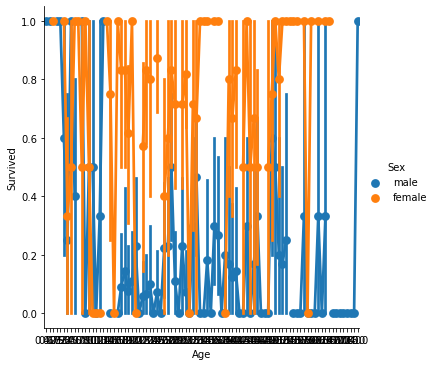

In [13]:
sns.factorplot('Age','Survived',hue='Sex',data=df_1)

In [14]:
# Step 7
df_1['Age'].fillna(df_1['Age'].mean(),inplace=True)


In [15]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_1['age_group'] = pd.cut(df_1.Age, range(0, 81, 10), right=False, labels=age_labels)

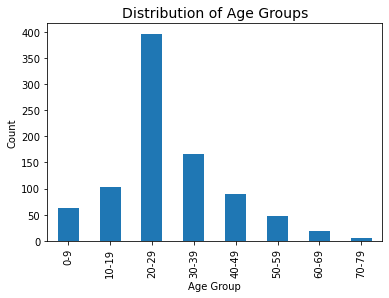

In [16]:
df_1.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [17]:
# Check if all Columns are clean
cols = df_1[['Embarked']]
print(cols['Embarked'].isna().sum())

2


In [18]:
#Übung 2 Splitdata

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()    
df_1['Embarked'] = labelencoder_X.fit_transform(df_1['Embarked'])
df_1['Sex'] = labelencoder_X.fit_transform(df_1['Sex'])
y=df_1['Survived']
X =df_1.drop(labels=['PassengerId','Survived','Name','Cabin', 'Ticket', 'age_group'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
206,3,1,32.000000,1,0,15.8500,2
367,3,0,29.699118,0,0,7.2292,0
851,3,1,74.000000,0,0,7.7750,2
255,3,0,29.000000,0,2,15.2458,0
511,3,1,29.699118,0,0,8.0500,2


In [20]:
m = LogisticRegression() #create a model, Classifier -> Welches Modell ich nutzen will
m.fit(X_train,y_train)   #train the model -> wendet die logistische Regression an

LogisticRegression()

In [21]:
## Accuracy Score
ypred = m.predict(X_test) 
accuracy_score(y_test,ypred)

0.7802690582959642

In [22]:
## Cross Validation Score

from sklearn.model_selection import cross_validate

model = LogisticRegression()
cv = cross_validate(model, X_train, y_train,
                    cv=5,
                    scoring='accuracy',
                    return_train_score=True
)
# convert the dictionary of lists into a DataFrame
cv = pd.DataFrame(cv)
print(cv)

   fit_time  score_time  test_score  train_score
0  0.023006    0.002005    0.820896     0.797753
1  0.017004    0.001007    0.820896     0.801498
2  0.015003    0.002001    0.805970     0.797753
3  0.017004    0.001003    0.729323     0.820561
4  0.018009    0.001001    0.819549     0.794393


C:\Users\vuger\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vuger\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [23]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

m_2 = RandomForestClassifier(max_depth = 5, n_estimators = 200) #create a model, Classifier 
m_2.fit(X_train,y_train)   #train the model 

RandomForestClassifier(max_depth=5, n_estimators=200)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
ypred_2 = m_2.predict(X_test) 
accuracy_score(y_test,ypred_2)

0.8071748878923767

In [26]:
# Fit the grid search to the data
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [27]:
CV_rfc = GridSearchCV(estimator=m_2, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [28]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [29]:
m_final = RandomForestClassifier(criterion='entropy',
 max_depth=5,
 max_features='log2',
 n_estimators=200)
m_final.fit(X_train,y_train)   

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=200)

In [30]:
ypred_final = m_final.predict(X_test) 
accuracy_score(y_test,ypred_final)

0.820627802690583